In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

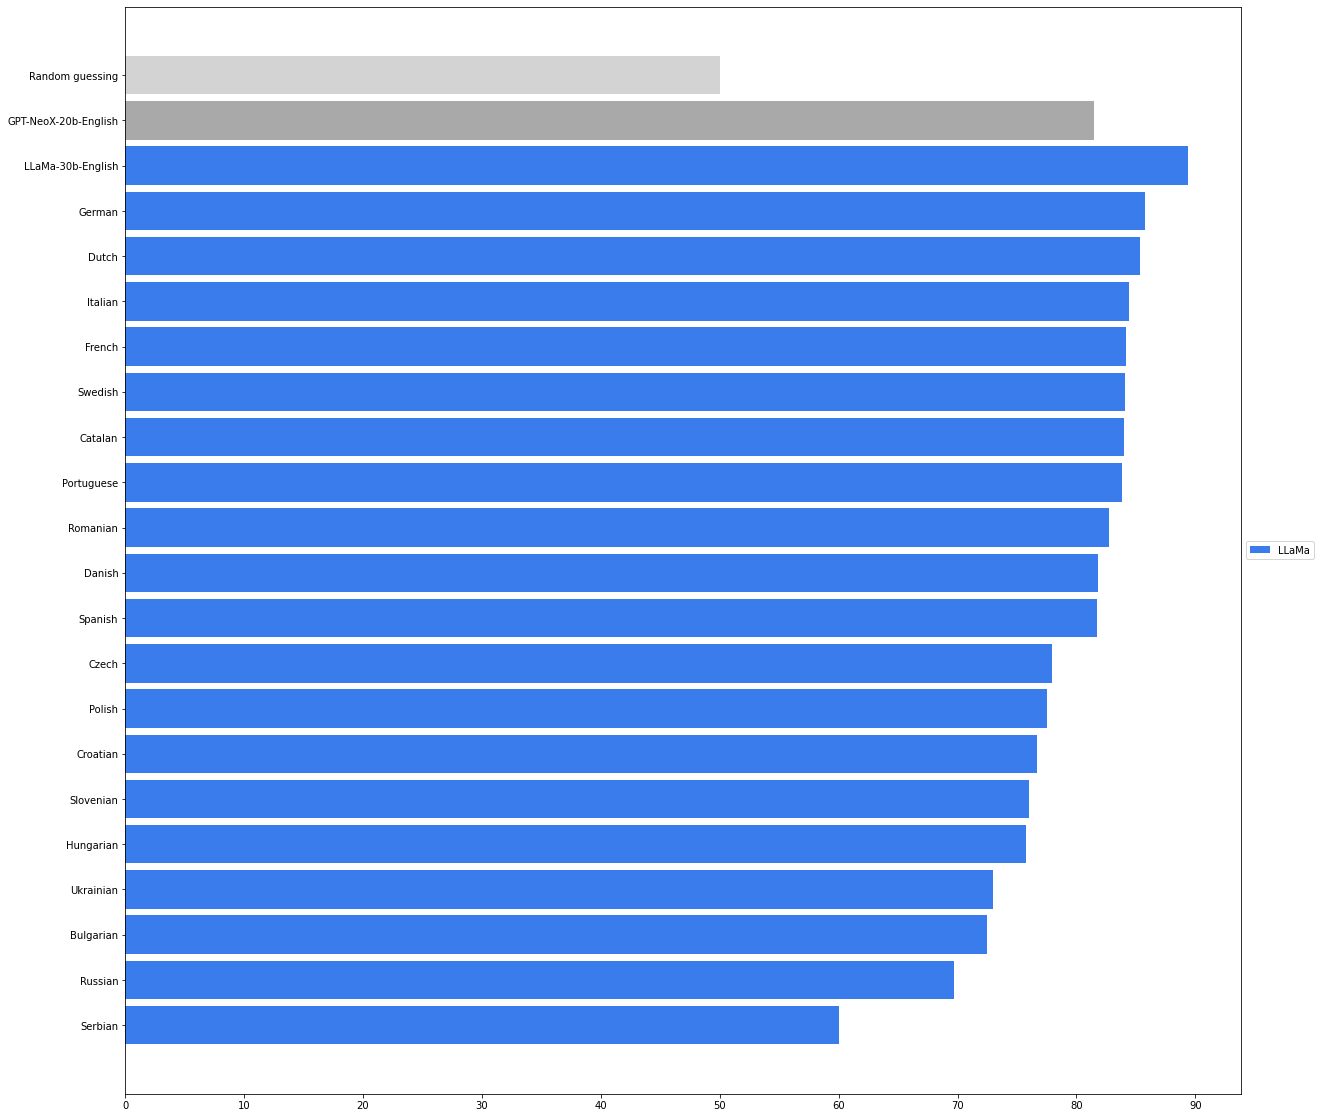

In [34]:
# horizontal bar plot

xlsx = pd.ExcelFile("assets/fact-completion-benchmark-results.xlsx")
llama = pd.read_excel(xlsx, "llama")
# bloom = pd.read_excel(xlsx, "bloom")
# mbert = pd.read_excel(xlsx, "m-bert")
# xlm = pd.read_excel(xlsx, "xlm-roberta")
llama = llama.sort_values(by="accuracy", ascending=False).reset_index(drop=True)

langs = llama["language"].tolist()

llamas_list, bloom_list, mbert_list, xlm_list = (
    [50, 81.50],
    [50, 81.50],
    [50, 81.50],
    [50, 81.50],
)

for lang in langs:
    llamas_list.append(llama[llama["language"] == lang].accuracy.tolist()[0])
    # bloom_list.append(bloom[bloom["language"] == lang].accuracy.tolist()[0])
    # mbert_list.append(mbert[mbert["language"] == lang].accuracy.tolist()[0])
    # xlm_list.append(xlm[xlm["language"] == lang].accuracy.tolist()[0])

llamas_list.reverse()
# bloom_list.reverse()
# mbert_list.reverse()
# xlm_list.reverse()
langs.reverse()
langs[-1] = "LLaMa-30b-English"
colors = ["#3b7cec"] * len(langs)

langs.append("GPT-NeoX-20b-English")
colors.append("darkgrey")
langs.append("Random guessing")
colors.append("lightgrey")

# Set the width of each bar
bar_width = 0.85

# Create an array for the positions of the bars
index = np.arange(len(langs))
plt.figure(figsize=(20, 20))

plt.barh(index, llamas_list, height=bar_width, color=colors, label="LLaMa")

# Set y-ticks to display language labels
plt.yticks(index, langs)

# Add legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Change tick freq
plt.xticks(np.arange(0, 100, 10))

# Save plot
plt.savefig("assets/LLaMa_h_bar_plot.png", dpi=500)

# Show plot
plt.show()

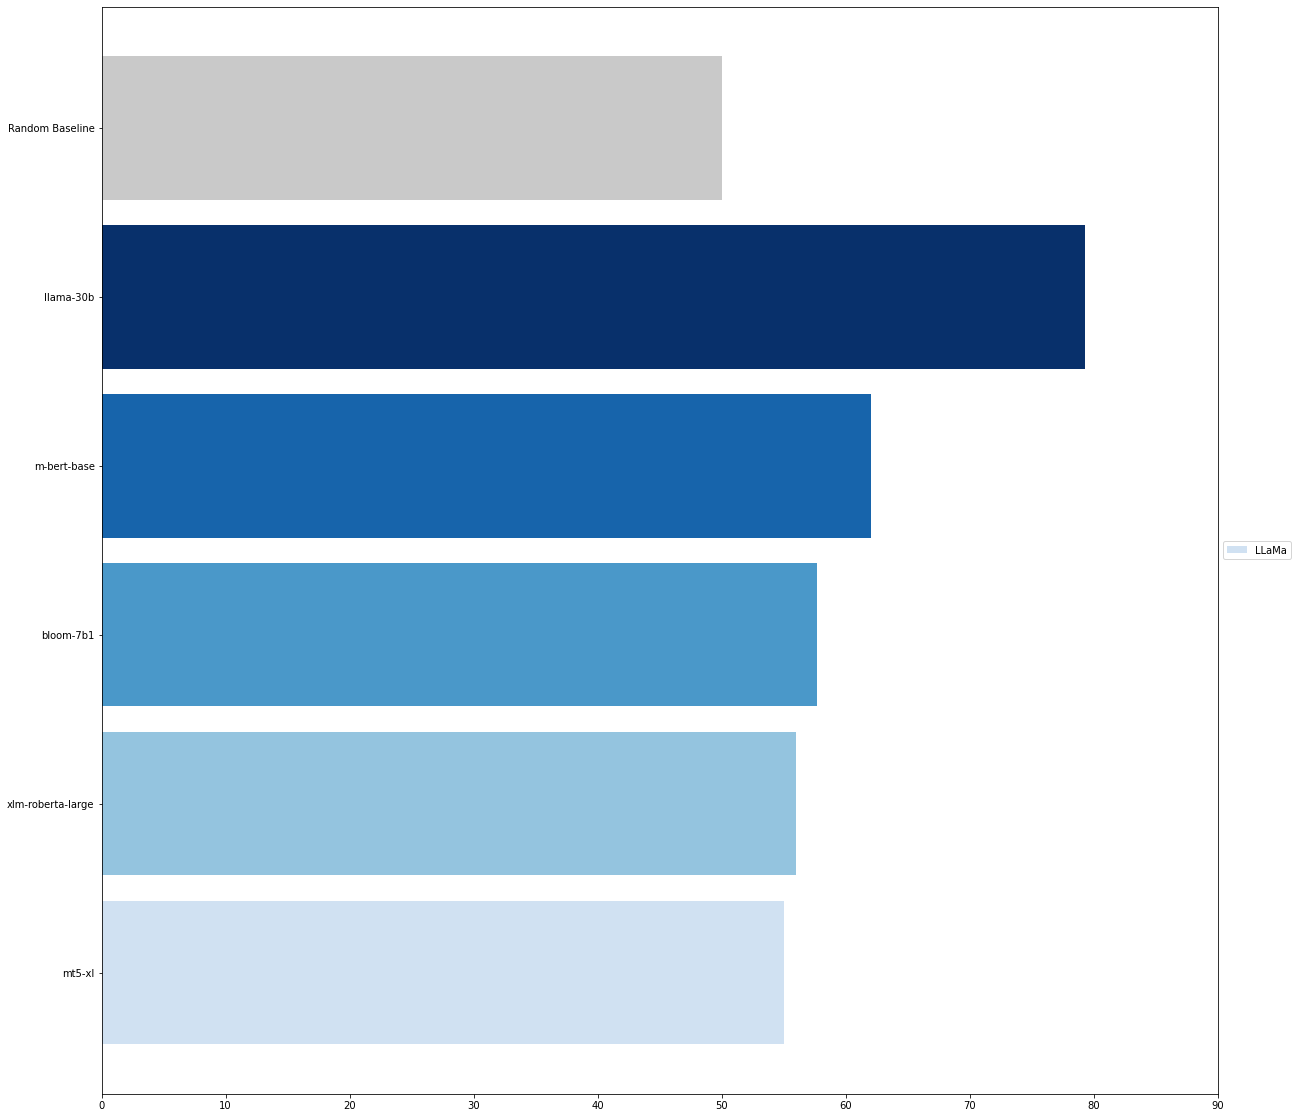

In [35]:
# horizontal bar plot for multilingual benchmark

multilingual_bench = pd.read_excel(xlsx, "multilingual-bench")
model = multilingual_bench["Model"].tolist()
perf = multilingual_bench["20 Languages\n(avg % correct)"].tolist()

perf.reverse()
model.reverse()

y = np.array([1, 2, 3, 4, 5, 6])

my_cmap = plt.get_cmap("Blues")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

colors = my_cmap(rescale(y))
colors[0:5] = colors[1:6]
colors[-1] = [0.79, 0.79, 0.79, 1.]
colors

# Set the width of each bar
bar_width = 0.85

# Create an array for the positions of the bars
index = np.arange(len(model))
plt.figure(figsize=(20, 20))

plt.barh(index, perf, height=bar_width, color=colors, label="LLaMa")

# Set y-ticks to display language labels
plt.yticks(index, model)

# Add legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Change tick freq
plt.xticks(np.arange(0, 100, 10))

# Save plot
plt.savefig("assets/multilingual_bench_h_bar_plot.png", dpi=500)

# Show plot
plt.show()

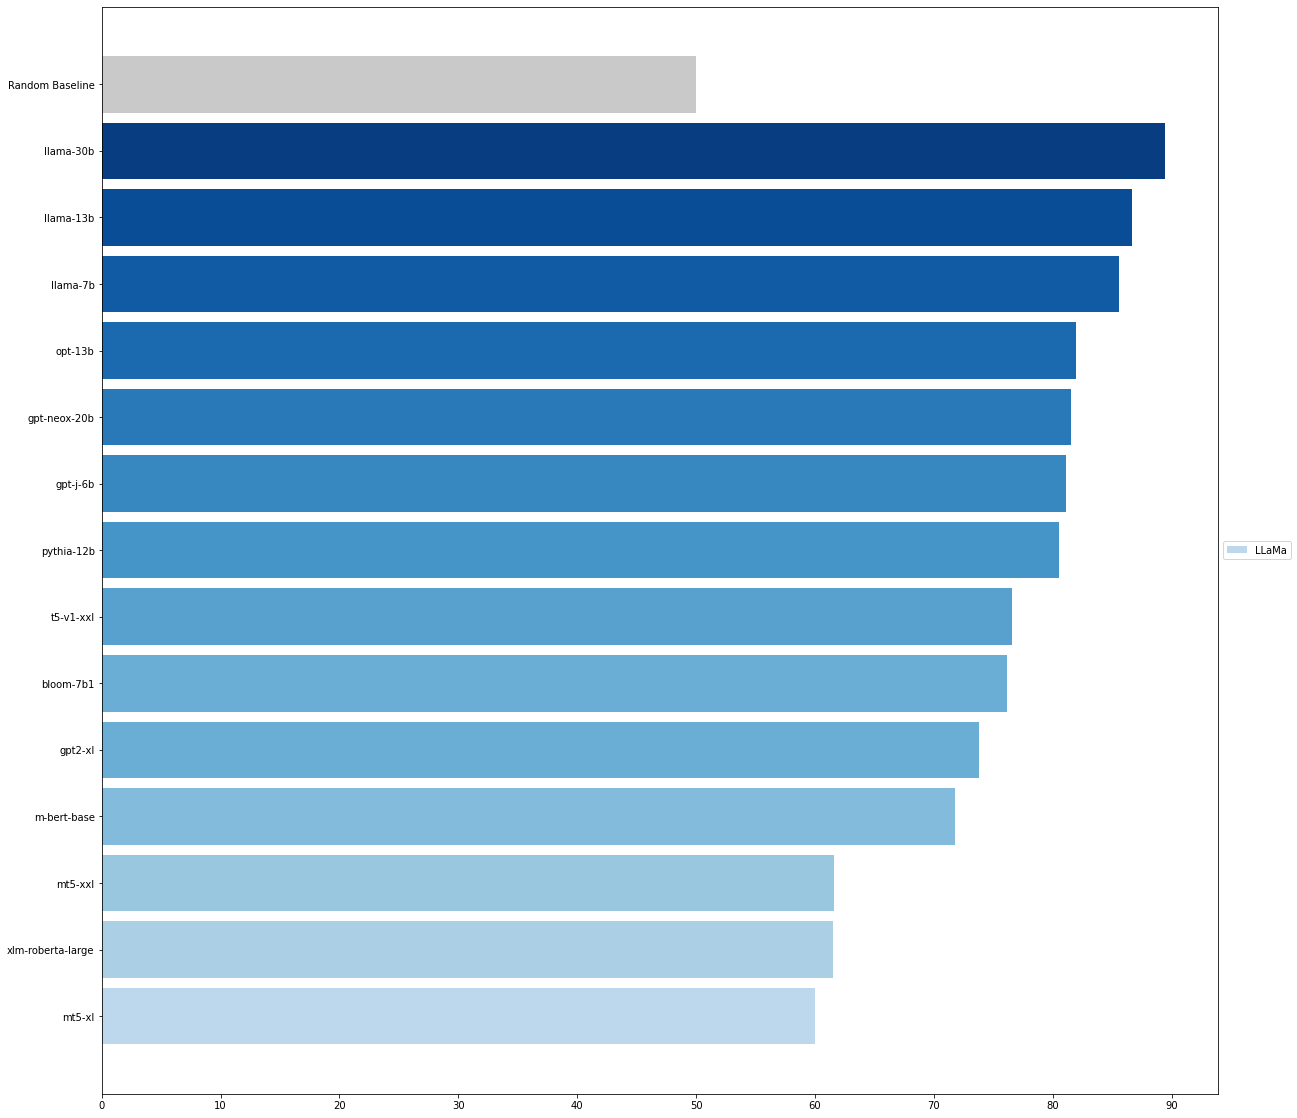

In [36]:
# horizontal bar plot for en benchmark

multilingual_bench = pd.read_excel(xlsx, "en-bench")
model = multilingual_bench["Model"].tolist()
perf = multilingual_bench["English-only\n(% correct)"].tolist()

perf.reverse()
model.reverse()

y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

my_cmap = plt.get_cmap("Blues")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

colors = my_cmap(rescale(y))
colors = colors[4:]
colors[0:5] = colors[1:6]
colors[-1] = [0.79, 0.79, 0.79, 1.]
colors

# Set the width of each bar
bar_width = 0.85

# Create an array for the positions of the bars
index = np.arange(len(model))
plt.figure(figsize=(20, 20))

plt.barh(index, perf, height=bar_width, color=colors, label="LLaMa")

# Set y-ticks to display language labels
plt.yticks(index, model)

# Add legend
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Change tick freq
plt.xticks(np.arange(0, 100, 10))

# Save plot
plt.savefig("assets/english_bench_h_bar_plot.png", dpi=500)

# Show plot
plt.show()

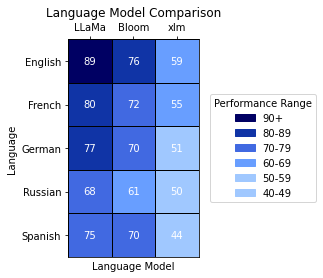

In [37]:
# heatmap

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

langs = ["English", "French", "German", "Russian", "Spanish"]
llama_perf = [89, 80, 77, 68, 75]
bloom_perf = [76, 72, 70, 61, 70]
mbert_perf = [59, 55, 51, 50, 44]

# Create colormap with custom colors
colors = ["#A0C8FF", "#689EFF", "#4169E1", "#1034A6", "#000063"]
cmap = mcolors.ListedColormap(colors)
bounds = [40, 50, 60, 70, 80, 90, 100]  # Update bounds to include lower bound
norm = plt.Normalize(vmin=min(bounds), vmax=max(bounds))

# Create figure and axes
fig, ax = plt.subplots()

# Create heatmap
im = ax.imshow(np.array([llama_perf, bloom_perf, mbert_perf]).T, cmap=cmap, norm=norm)

# Add solid borders between squares
for i in range(len(langs)):
    for j in range(3):
        ax.add_patch(
            plt.Rectangle(
                (j - 0.5, i - 0.5), 1, 1, fill=False, edgecolor="black", linewidth=1
            )
        )

# Fill in numerical values in white for all values
for i in range(len(langs)):
    for j in range(3):
        value = np.array([llama_perf, bloom_perf, mbert_perf]).T[i, j]
        if value >= 40:  # Update threshold for text labels
            ax.text(j, i, value, ha="center", va="center", color="white")

# Set ticks and labels for x and y axes
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(len(langs)))
ax.set_xticklabels(["LLaMa", "Bloom", "xlm"])
ax.set_yticklabels(langs)
ax.xaxis.tick_top()  # Move x-axis ticks to the top

# Reverse the order of legend labels and handles
legend_labels = ["40-49", "50-59", "60-69", "70-79", "80-89", "90+"][
    ::-1
]  # Update legend labels and reverse order
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=cmap(norm(bounds[i])))
    for i in range(len(legend_labels))
][
    ::-1
]  # Update legend handles and reverse order

# Add legend
ax.legend(
    legend_handles,
    legend_labels,
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    title="Performance Range",
)
ax.get_legend().get_title().set_fontsize("10")

# Set title and labels for the plot
plt.title("Language Model Comparison")
plt.xlabel("Language Model")
plt.ylabel("Language")
plt.show()